## The Relaxation Method

An elementary method for solving nonlinear equations, such as,
$$ x = 2 - e^x $$
* Make an initial guess for $x$
* Plug it in the right side, to obtain an updated value of $x$ on the left side
* Keep repeating until the guess and result converges to a *fixed point*

Note that:
* Equation must be in the form $x=f(x)$
* In case the equation has multiple solution, the relaxation method results in the convergence to a particular solution, depending on the location of the initial guess
* May never converge

In [1]:
# solving for x=2-e^-x
import numpy as np

x = 1.0
for i in range(10):
    x = 2 - np.exp(-x)
    print(x)

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


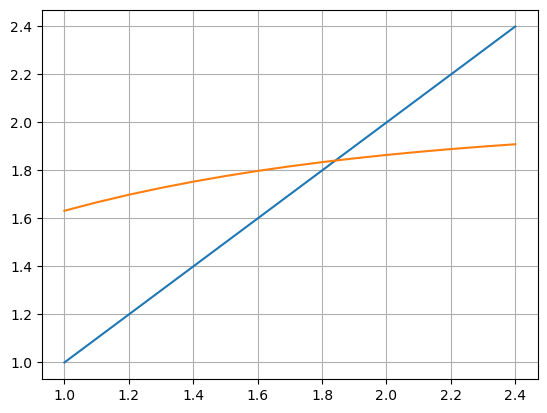

In [2]:
import matplotlib.pyplot as plt

x = np.arange(1,2.5,0.1)
plt.plot(x,x)
plt.plot(x,2-np.exp(-x))
plt.grid()

In [3]:
# solving for x=e^(1-x^2)
# clearly this has a solution x = 1
import numpy as np

x = 0.5
for i in range(10):
    x = np.exp(1-x*x)
    print(x)

2.117000016612675
0.030755419069985038
2.715711832754083
0.0017034651847384463
2.71827394057758
0.001679913095081425
2.7182741571849562
0.0016799111168229455
2.7182741572030236
0.0016799111166579386


In [4]:
# remedy to oscillating relaxation method: rearranging the equation
# solving for x=sqrt(1-logx)
import numpy as np

x = 0.5
for i in range(10):
    x = np.sqrt(1-np.log(x))
    print(x)

1.3012098910475378
0.8583154914892762
1.0736775779454883
0.9637999044091371
1.0182689104343374
0.990906635925747
1.004557096969838
0.997724037576543
1.0011386299421705
0.9994308469350205


### Criteria for convergence

The relaxation method will converge to a solution at $x^*$, if and only if,
$$ |f^\prime(x^*)| < 1 $$
If the relaxation method fails to converge for $x=f(x)$, it will suceed for the inverse form of the equation: $x = f^{-1}(x)$.  
However, not all equations can be inverted. Theoretically, there is no formal way out of that situation -- we leave it up to chance.  

### Error at each step
$$ \epsilon_i = \frac{x_{i-1}-x_i}{1-1/f^\prime(x^*)} \simeq \frac{x_{i-1}-x_i}{1-1/f^\prime(x_{i-1})} $$

## Ferromagnetism

The strength $M$ of magnetization of a ferromagnetic material like iron depends on temperature $T$ according to the formula:
$$ M = \mu \tanh\frac{JM}{k_BT} $$
where $\mu$ is a magnetic moment, $J$ is a coupling constant, and $k_B$ is Boltzmann's constant. With the substitution, $m=M/\mu$ and $C=\mu J/k_B$,
$$ m = \tanh \frac{Cm}{T} $$
What is the non-trivial solution for this equation? Assume $C=1$.   
The error at each step is 
$$ \epsilon_i = \frac{m_{i-1}-m_i}{1-T\cosh^2(m_{i-1}/T)} $$

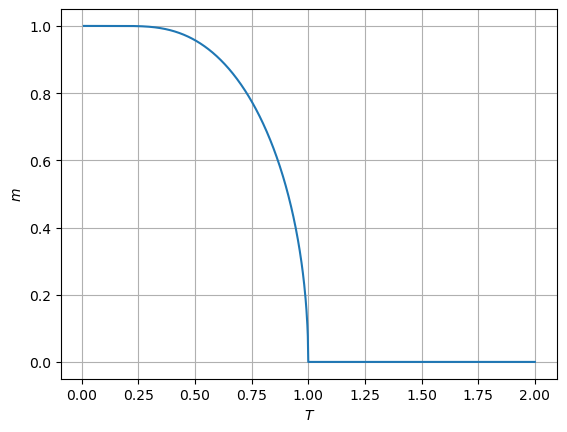

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Tmax     = 2.0
N        = 1000    # length of temperature array
accuracy = 1e-6

m = []
temp = np.linspace(0.01,Tmax,N)
for T in temp:
    m1    = 1.0   # initial guess for m
    error = 1.0   
    
    while error>accuracy:
        m1, m2 = np.tanh(m1/T), m1
        error = abs((m1-m2)/(1-T*np.cosh(m2/T)**2))
    m.append(m1)

plt.plot(temp,m)
plt.ylabel(r'$m$')
plt.xlabel(r'$T$')
plt.grid()

The relaxation method only finds trivial solution $m=0$ for $T>1$.  

### Is this a real physical phenomenon or a numerical artifact?

The plot above shows the **phase transition** of the magnet as it heats up; $T=1$ is its **critical temperature**.

## Relaxation method for two or more variables

### Glycolysis

The breakdown of glucose in the body to release energy can be modeled by the equations:
$$ 
\begin{align}
\frac{dx}{dt} =& -x + ay + x^2 y \\
\frac{dy}{dt} =& b - ay - x^2 y 
\end{align}
$$
Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P, and $a$ and $b$ are positive constants.  
The stationary points (derivatives of $x$ and $y$ become zero and their values stop changing) of this process are solutions of 
$$
\begin{align}
-x + ay + x^2y =& 0 \\
b -ay -x^2y =& 0
\end{align}
$$
These can be rearranged as
$$
\begin{align}
x =& y(a + x^2) \\
y =& \frac{b}{a+x^2}
\end{align}
$$

In [6]:
a, b = 1, 2
x, y = 0.5, 0.1
xt, yt = b, b/(a+b*b)
for i in range(10):
    x = y*(a+x*x)
    y = b/(a+x*x)
    print(x,y)
print("Actual solution: x =",xt,", y =",yt)

0.125 1.9692307692307693
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
2.0 0.4
Actual solution: x = 2 , y = 0.4


# Try it yourself

### Total 4 marks

Consider the following equation, which arises in the physics of contact processes, mathematical models of epidemics, and theory of random graphs:
$$ x= 1 - e^{-cx} $$
Solve for $x$ up to an accuracy of $10^{-6}$ for $c=2$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

c        = 2
accuracy = 1e-6

x1    = 1.0   # initial guess for x
error = 1.0   

while error>accuracy:
    x = 1 - np.exp(-c*x1)
    error = abs(x-x1)
    x1 = x

print(x,error)

0.7968126311118457 7.319848429609976e-07
